<a href="https://colab.research.google.com/github/kgovindaraju123/AIML/blob/master/L1_L2_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from statsmodels.tools.eval_measures import rmse
import matplotlib.pylab as plt

# Make pylab inline and set the theme to 'ggplot'
plt.style.use('ggplot')


# Read Boston Housing Data
data = pd.read_csv('Housing.csv')

# Create a data frame with all the independent features
data_indep = data.drop('medv', axis = 1)

# Create a target vector(vector of dependent variable, i.e. 'medv')
data_dep = data['medv']

# Split data into training and test sets
train_X, test_X, train_y, test_y = train_test_split(data_indep, data_dep,test_size = 0.20,random_state = 42)

Regression without any Outliers:

At this moment, our housing dataset is pretty much clean and doesn’t contain any outliers as such. So let’s fit a GB regressor with L1 and L2 loss functions.

In [13]:
# GradientBoostingRegressor with a L1(Least Absolute Deviations) loss function
# Set a random seed so that we can reproduce the results
np.random.seed(32767)

mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 3.372776


With a L1 loss function and no outlier we get a value of RMSE: 3.440147. Let’s see what results we get with L2 loss function.

In [14]:
# GradientBoostingRegressor with L2(Least Square errors) loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 2.502083


This prints out a mean squared value of RMSE -> 2.542019.

As apparent from RMSE errors of L1 and L2 loss functions, Least Squares(L2) outperform L1, when there are no outliers in the data.
Regression with Outliers:

After looking at the minimum and maximum values of ‘medv’ column, we can see that the range of values in ‘medv’ is [5, 50].
Let’s add a few Outliers in this Dataset, so that we can see some significant differences with L1 and L2 loss functions.

In [15]:
# Get upper and lower bounds[min, max] of all the features
stats = data.describe()
extremes = stats.loc[['min', 'max'],:].drop('medv', axis = 1)
extremes

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
min,0.00632,0.0,0.46,0.0,0.385,3.561,2.9,1.1296,1.0,187.0,12.6,0.32,1.73
max,88.97620,100.0,27.74,1.0,0.871,8.780,100.0,12.1265,24.0,711.0,22.0,396.90,37.97


Now, we are going to generate 5 random samples, such that their values lies in the [min, max] range of respective features.

In [16]:
# Set a random seed
np.random.seed(1234)

# Create 5 random values 
rands = np.random.rand(5, 1)
rands

# Get the 'min' and 'max' rows as numpy array
min_array = np.array(extremes.loc[['min'], :])
max_array = np.array(extremes.loc[['max'], :])

# Find the difference(range) of 'max' and 'min'
range = max_array - min_array

# Generate 5 samples with 'rands' value
outliers_X = (rands * range) + min_array
outliers_X

array([[1.70457825e+01, 1.91519450e+01, 5.68465061e+00, 1.91519450e-01,
        4.78078453e-01, 4.56054001e+00, 2.14965386e+01, 3.23572024e+00,
        5.40494736e+00, 2.87356192e+02, 1.44002828e+01, 7.62727836e+01,
        8.67066488e+00],
       [5.53552627e+01, 6.22108771e+01, 1.74311273e+01, 6.22108771e-01,
        6.87344863e-01, 6.80778568e+00, 6.33067617e+01, 7.97086794e+00,
        1.53085017e+01, 5.12984996e+02, 1.84478224e+01, 2.47035896e+02,
        2.42752219e+01],
       [3.89509044e+01, 4.37727739e+01, 1.24012127e+01, 4.37727739e-01,
        5.97735681e-01, 5.84550107e+00, 4.54033635e+01, 5.94324817e+00,
        1.10677380e+01, 4.16369335e+02, 1.67146407e+01, 1.73914067e+02,
        1.75932533e+01],
       [6.98795789e+01, 7.85358584e+01, 2.18845822e+01, 7.85358584e-01,
        7.66684272e-01, 7.65978645e+00, 7.91583185e+01, 9.76610981e+00,
        1.90632474e+01, 5.98527898e+02, 1.99823707e+01, 3.11777507e+02,
        3.01913951e+01],
       [6.94006741e+01, 7.79975808e+

In [0]:
# We will also create some hard coded outliers
# for 'medv', i.e. our target
medv_outliers = np.array([0, 0, 600, 700, 600])

Text(0, 0.5, 'count')

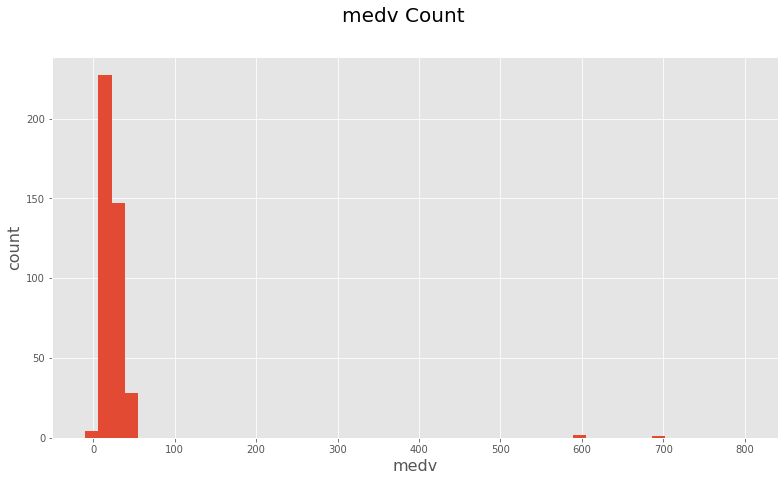

In [18]:
# Change the type of 'chas', 'rad' and 'tax' to rounded of Integers
outliers_X[:, [3, 8, 9]] = np.int64(np.round(outliers_X[:, [3, 8, 9]]))

# Finally concatenate our existing 'train_X' and
# 'train_y' with these outliers
train_X = np.append(train_X, outliers_X, axis = 0)
train_y = np.append(train_y, medv_outliers, axis = 0)

# Plot a histogram of 'medv' in train_y
fig = plt.figure(figsize=(13,7))
plt.hist(train_y, bins=50, range = (-10, 800))
fig.suptitle('medv Count', fontsize = 20)
plt.xlabel('medv', fontsize = 16)
plt.ylabel('count', fontsize = 16)

You can see there are some clear outliers at 600, 700 and even one or two ‘medv’ values are 0.
Since, our outliers are in place now, we will once again fit the GradientBoostingRegressor with L1 and L2 Loss functions to see the contrast in their performances with outliers.

In [19]:
# GradientBoostingRegressor with L1 loss function
np.random.seed(9876)

mod = GradientBoostingRegressor(loss='lad')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 3.659125


In [20]:
# GradientBoostingRegressor with L2 loss function
mod = GradientBoostingRegressor(loss='ls')

fit = mod.fit(train_X, train_y)
predict = fit.predict(test_X)

# Root Mean Squared Error
print ("RMSE -> %f" % rmse(predict, test_y))

RMSE -> 9.779870


On the other hand, we get a RMSE value of 9.806251, with L2 loss function and existing outliers.

With outliers in the dataset, a L2(Loss function) tries to adjust the model according to these outliers on the expense of other good-samples, since the squared-error is going to be huge for these outliers(for error > 1). On the other hand L1(Least absolute deviation) is quite resistant to outliers.
As a result, L2 loss function may result in huge deviations in some of the samples which results in reduced accuracy.

So, if you can ignore the ouliers in your dataset or you need them to be there, then you should be using a L1 loss function, on the other hand if you don’t want undesired outliers in the dataset and would like to use a stable solution then first of all you should try to remove the outliers and then use a L2 loss function. Or performance of a model with a L2 loss function may deteriorate badly due to the presence of outliers in the dataset.